**Value-at-Risk (VaR**) measures the risk associated with a position, portfolio, etc.

VaR reports the worst expected loss—at a given level of confidence—over a certain horizon under normal market conditions.

Let’s say that the 1-day 95% VaR of our portfolio is 100. This means that 95% of the time (under normal market conditions), we will not lose more than 100 by holding our portfolio over one day.

Negative value VaR means 'making a profit'

In [1]:
pip install yfinance

In [2]:
pip install seaborn

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns

In [4]:
RISKY_ASSETS = ["AMD", "INTC"]
SHARES = [5, 5]
START_DATE = "2020-01-01"
END_DATE = "2020-12-31"
T = 1
N_SIMS = 10 ** 5

In [6]:
df = yf.download(RISKY_ASSETS, start=START_DATE, end=END_DATE)

[*********************100%%**********************]  2 of 2 completed


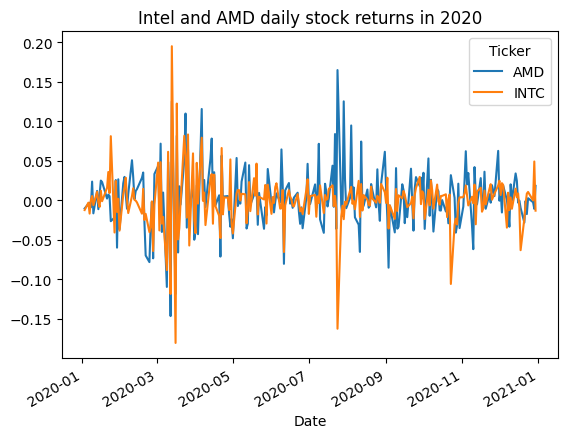

In [7]:
# calculate daily returns

returns = df['Adj Close'].pct_change().dropna()
returns.plot(title='Intel and AMD daily stock returns in 2020');

In [9]:
# covariance matrix of returns
cov_mat = returns.cov()

# cholesky decomposition
chol_mat = np.linalg.cholesky(cov_mat)

In [10]:
# draw correlated random numbers from std normal distribution
rv = np.random.normal(size=(N_SIMS, len(RISKY_ASSETS)))
correlated_rv = np.transpose(np.matmul(chol_mat, np.transpose(rv)))

In [11]:
# metrics for simulation

r = np.mean(returns, axis=0).values
sigma = np.std(returns, axis=0).values
S_0 = df["Adj Close"].values[-1, :]
P_0 = np.sum(SHARES * S_0)

In [12]:
# calculate terminal price of stock
S_T = S_0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * correlated_rv)


In [13]:
# calculate terminal portfolio value and portfolio returns
P_T = np.sum(SHARES * S_T, axis=1)
P_diff = P_T - P_0

In [14]:
# calculate VaR at selected confidence levels

P_diff_sorted = np.sort(P_diff)
percentiles = [0.01, 0.1, 1.]
var = np.percentile(P_diff_sorted, percentiles)
for x, y in zip(percentiles, var):
    print(f'1-day VaR with {100-x}% confidence: ${-y:.2f}')


1-day VaR with 99.99% confidence: $2.08
1-day VaR with 99.9% confidence: $1.57
1-day VaR with 99.0% confidence: $0.95


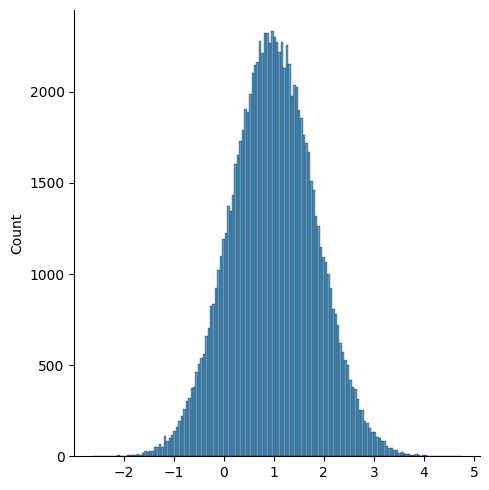

In [19]:
ax = sns.displot(P_diff, kde=False)

